# Метод k-ближайших соседей.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Парсим наш датасет.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
path = 'Data/Semion_dataset.txt'

In [8]:
digits = []
labels = []
with open(path) as f:
    for line in f:
        labels.append(line.split()[-10:].index('1'))
        digits.append([float(x) for x in line.split()[:-10]])

Смотрим что получилось

In [9]:
digits = np.array(digits)
labels = np.array(labels)
digits.shape, labels.shape

((1593, 256), (1593,))

In [10]:
labels

array([0, 0, 0, ..., 9, 9, 9])

9

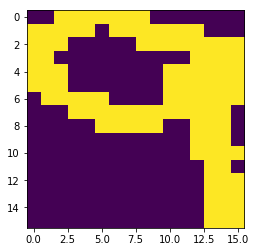

In [11]:
num = 1559
plt.imshow(digits[num].reshape(16, 16))
labels[num]

In [12]:
import pandas as pd

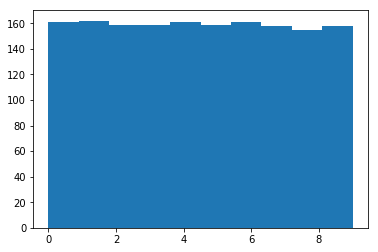

In [13]:
df = pd.DataFrame(labels)
plt.hist(labels);

In [14]:
df[0].value_counts()

1    162
6    161
4    161
0    161
5    159
3    159
2    159
9    158
7    158
8    155
Name: 0, dtype: int64

### Knn

Разделим датасет на обучающую и тестовую выборки с помощью `train_test_split`.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits, labels, test_size=0.25)

Импортируем классификатор и обучим его.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Посмотрим на результаты.

In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy is ')
accuracy_score(y_test, model.predict(x_test))

Accuracy is 


0.8947368421052632

Посмотрим что запредиктит наша модель на известную нам цифру под номером `num`.

In [18]:
model.predict(digits[num][None])[0]

9

Посмотрим на потери на тренировочной и валидационной выборках.

In [19]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_train, err_test

(0.0695142378559464, 0.10526315789473684)

Построим матрицу несоответствий.

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 39,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 42,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  8,  0,  0,  2,  0,  0, 29,  0,  0],
       [ 0,  1,  3,  4,  0,  2,  0,  0, 31,  2],
       [ 2,  1,  0,  5,  0,  2,  0,  0,  2, 26]], dtype=int64)

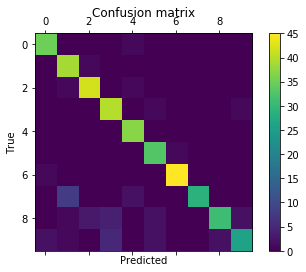

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
df = pd.DataFrame(y_test_predict)
df[0].value_counts()

1    50
3    49
6    46
2    46
4    41
5    38
0    38
8    33
9    29
7    29
Name: 0, dtype: int64

### Протюним наш классификатор.

Найдем наилучшие параметры для нашего датасета.

In [23]:
from sklearn.grid_search import GridSearchCV
params = {"n_neighbors": np.arange(1, 10), 
          "metric": ["euclidean", "manhattan", "chebyshev"],
          "weights": ["uniform","distance"]}
grid = GridSearchCV(model, params)

In [24]:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'metric': ['euclidean', 'manhattan', 'chebyshev'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Вот они:

In [25]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

А вот и точность:

In [26]:
grid.score(x_test, y_test)

0.9072681704260651

А что по потерям?

In [23]:
y_train_predict = grid.predict(x_train)
y_test_predict = grid.predict(x_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_train, err_test

(0.0, 0.08771929824561403)

Посмотрим что покажет матрица несоответствий.

In [24]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  2,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 1,  3,  4,  1,  0,  0,  1,  0, 28,  2],
       [ 1,  3,  0,  2,  1,  2,  0,  0,  1, 31]], dtype=int64)

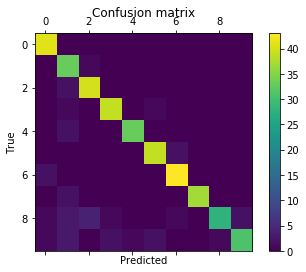

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
df = pd.DataFrame(y_test_predict)
df[0].value_counts()

6    46
1    46
2    45
0    45
5    42
3    42
7    37
4    34
9    33
8    29
Name: 0, dtype: int64